## Importing Libraries

In [1]:
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import tensorflow as tf
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.python.keras.models import load_model
import numpy as np

## Importing Datasets

In [2]:
df = pd.read_csv('seattle-weather.csv')
df

date  precipitation  temp_max  temp_min  wind  weather
0     2012-01-01            0.0      12.8       5.0   4.7  drizzle
1     2012-01-02           10.9      10.6       2.8   4.5     rain
2     2012-01-03            0.8      11.7       7.2   2.3     rain
3     2012-01-04           20.3      12.2       5.6   4.7     rain
4     2012-01-05            1.3       8.9       2.8   6.1     rain
...          ...            ...       ...       ...   ...      ...
1456  2015-12-27            8.6       4.4       1.7   2.9     rain
1457  2015-12-28            1.5       5.0       1.7   1.3     rain
1458  2015-12-29            0.0       7.2       0.6   2.6      fog
1459  2015-12-30            0.0       5.6      -1.0   3.4      sun
1460  2015-12-31            0.0       5.6      -2.1   3.5      sun

[1461 rows x 6 columns]

## Checking Outliers and Cleaning Outliers

In [3]:
#Checking Null
print(df.isnull().values.any())
#Checking Outliers
print(df.describe())

False
       precipitation     temp_max     temp_min         wind
count    1461.000000  1461.000000  1461.000000  1461.000000
mean        3.029432    16.439083     8.234771     3.241136
std         6.680194     7.349758     5.023004     1.437825
min         0.000000    -1.600000    -7.100000     0.400000
25%         0.000000    10.600000     4.400000     2.200000
50%         0.000000    15.600000     8.300000     3.000000
75%         2.800000    22.200000    12.200000     4.000000
max        55.900000    35.600000    18.300000     9.500000


The Max Value is too big than mean. High possiblity in outlier, visualization of data is need it

In [4]:
cols = df.columns
#print(cols)

for col in cols:
  if col != 'date' and col !='weather':
    fig = px.box(df,y=col)
    fig.show()

It appears the problem lies within Wind and percipitation. in order to solve i choose capping method so the data can be used for training.



In [5]:
upper_limit_precip = df['precipitation'].mean() + 3*df['precipitation'].std()
upper_limit_wind = df['wind'].mean() + 3*df['wind'].std()
print('precipitation higher limit:',upper_limit_precip)
print('precipitation higher limit:',upper_limit_wind)

lower_limit_precip = df['precipitation'].mean() - 3*df['precipitation'].std()
lower_limit_wind = df['wind'].mean() - 3*df['wind'].std()
print('precipitation lower limit:',lower_limit_precip)
print('precipitation lower limit:',lower_limit_wind)

precipitation higher limit: 23.070014862905886
precipitation higher limit: 7.554611384700518
precipitation lower limit: -17.011151070982542
precipitation lower limit: -1.0723389685471982


In [6]:
df['precipitation'] = np.where(df['precipitation'] > upper_limit_precip,upper_limit_precip,np.where(df['precipitation'] < lower_limit_precip,lower_limit_precip,df['precipitation']))
df['wind'] = np.where(df['wind'] > upper_limit_wind,upper_limit_wind,np.where(df['wind'] < lower_limit_wind,lower_limit_wind,df['wind']))

In [7]:
px.box(df,y='precipitation')


In [8]:
px.box(df,y='wind')

Despite the outlier is still visible, it has become more dense and tidy than previous graph. in which, i shall continue to changing the value of the target into integer concluding the Outlier process.

In [9]:
df['weather'].unique()

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

after which i apply One Hot Encoding technique so there will be 5 targets in which are drizzle,rain,sun,snow,fog

In [10]:
df = pd.get_dummies(df, columns = ['weather'])
print(df)

            date  precipitation  temp_max  temp_min  wind  weather_drizzle  \
0     2012-01-01            0.0      12.8       5.0   4.7             True   
1     2012-01-02           10.9      10.6       2.8   4.5            False   
2     2012-01-03            0.8      11.7       7.2   2.3            False   
3     2012-01-04           20.3      12.2       5.6   4.7            False   
4     2012-01-05            1.3       8.9       2.8   6.1            False   
...          ...            ...       ...       ...   ...              ...   
1456  2015-12-27            8.6       4.4       1.7   2.9            False   
1457  2015-12-28            1.5       5.0       1.7   1.3            False   
1458  2015-12-29            0.0       7.2       0.6   2.6            False   
1459  2015-12-30            0.0       5.6      -1.0   3.4            False   
1460  2015-12-31            0.0       5.6      -2.1   3.5            False   

      weather_fog  weather_rain  weather_snow  weather_sun  
0 

In [11]:
weather_cols = ["weather_drizzle", "weather_fog", "weather_rain", "weather_snow", "weather_sun"]

# Convert the selected columns to integers
df[weather_cols] = df[weather_cols].astype(int)

In [12]:
print(df)

            date  precipitation  temp_max  temp_min  wind  weather_drizzle  \
0     2012-01-01            0.0      12.8       5.0   4.7                1   
1     2012-01-02           10.9      10.6       2.8   4.5                0   
2     2012-01-03            0.8      11.7       7.2   2.3                0   
3     2012-01-04           20.3      12.2       5.6   4.7                0   
4     2012-01-05            1.3       8.9       2.8   6.1                0   
...          ...            ...       ...       ...   ...              ...   
1456  2015-12-27            8.6       4.4       1.7   2.9                0   
1457  2015-12-28            1.5       5.0       1.7   1.3                0   
1458  2015-12-29            0.0       7.2       0.6   2.6                0   
1459  2015-12-30            0.0       5.6      -1.0   3.4                0   
1460  2015-12-31            0.0       5.6      -2.1   3.5                0   

      weather_fog  weather_rain  weather_snow  weather_sun  
0 

In [13]:
df.iloc[:,5:10]

weather_drizzle  weather_fog  weather_rain  weather_snow  weather_sun
0                   1            0             0             0            0
1                   0            0             1             0            0
2                   0            0             1             0            0
3                   0            0             1             0            0
4                   0            0             1             0            0
...               ...          ...           ...           ...          ...
1456                0            0             1             0            0
1457                0            0             1             0            0
1458                0            1             0             0            0
1459                0            0             0             0            1
1460                0            0             0             0            1

[1461 rows x 5 columns]

## Model Training

In [14]:
X = np.array(df.iloc[:,1:5])
y = np.array(df.iloc[:,5:10])

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2


(array([[846.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  30.],
        [822.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  54.],
        [479.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 397.],
        [864.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  12.],
        [493.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 383.]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 5 BarContainer objects>)

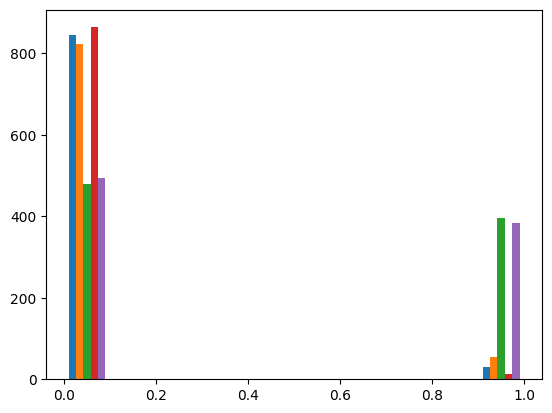

In [16]:
plt.hist(y_train)

In [17]:
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)


(array([[1231.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           30.],
        [1207.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           54.],
        [ 864.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          397.],
        [ 864.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          397.],
        [ 878.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          383.]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 5 BarContainer objects>)

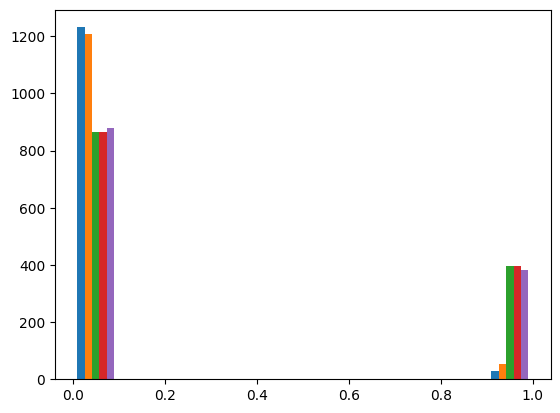

In [18]:
plt.hist(y_train_over)

In [19]:
def model_trainer(X,y,num_modes,dropout_prob,lr,batch_size,epoch):
  nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(num_modes, activation ='relu'),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(num_modes, activation ='relu'),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(num_modes, activation ='relu'),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(num_modes, activation ='relu'),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(5,activation ='softmax'),
])
  nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                loss=tf.keras.losses.CategoricalCrossentropy(),
                metrics=['accuracy'])
  history = nn_model.fit(X, y, epochs=epoch,batch_size=batch_size, validation_data=(X_val, y_val),verbose=0)
  return nn_model,history

In [20]:
def plot_historys(history):
  fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,6))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary_Crossentropy')
  ax1.grid(True)
  ax1.legend()
  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label = 'val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)
  ax2.legend()
  plt.show()

32 nodes,dropout 0,lr 0.01,batch_sizes 32


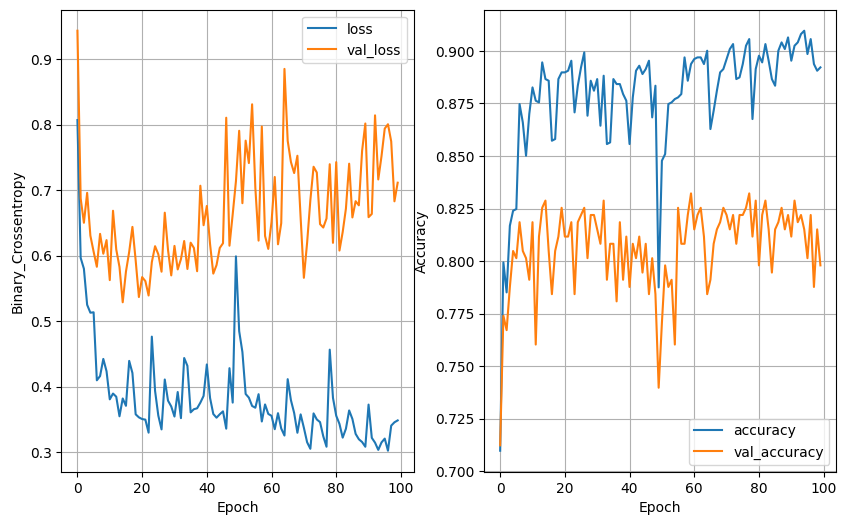

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8155 - loss: 0.6280 
32 nodes,dropout 0,lr 0.01,batch_sizes 64


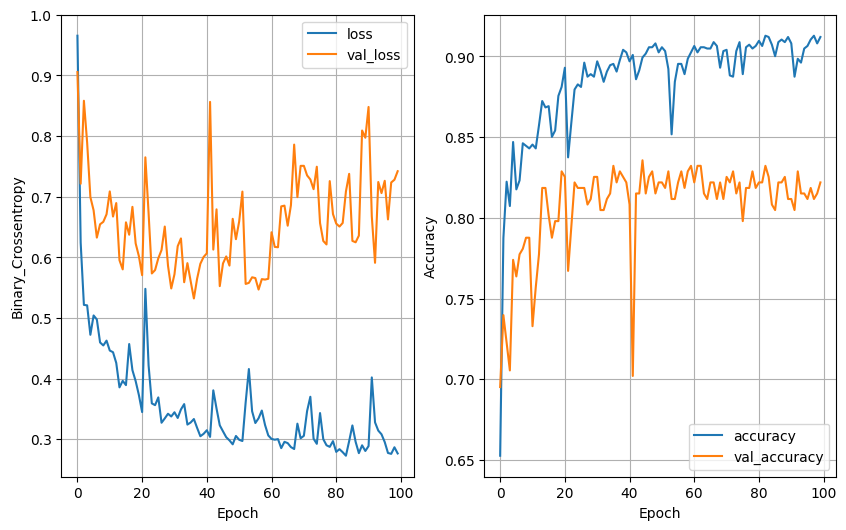

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8334 - loss: 0.6745 
32 nodes,dropout 0,lr 0.01,batch_sizes 128


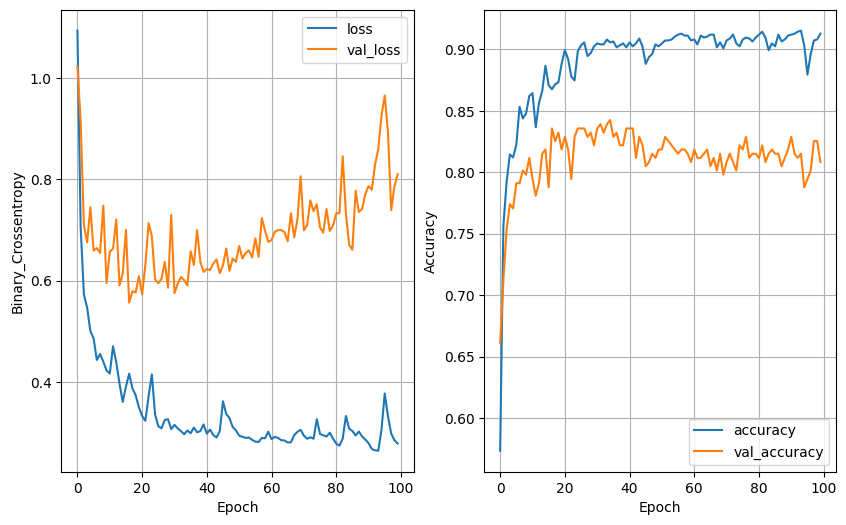

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8070 - loss: 0.8000 
32 nodes,dropout 0,lr 0.005,batch_sizes 32


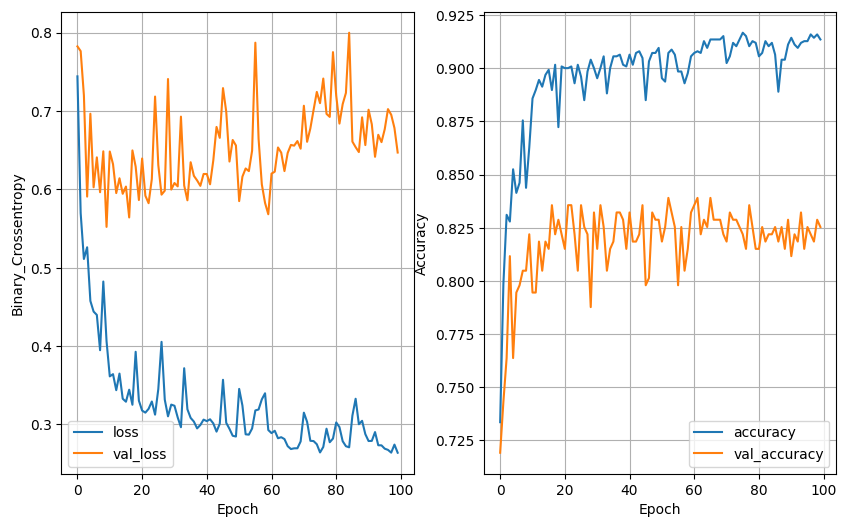

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8466 - loss: 0.5593 
32 nodes,dropout 0,lr 0.005,batch_sizes 64


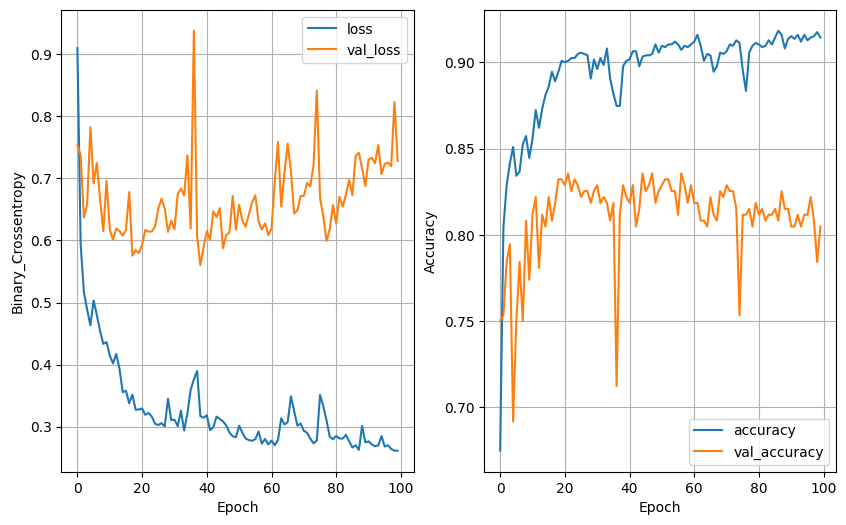

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8050 - loss: 0.7013 
32 nodes,dropout 0,lr 0.005,batch_sizes 128


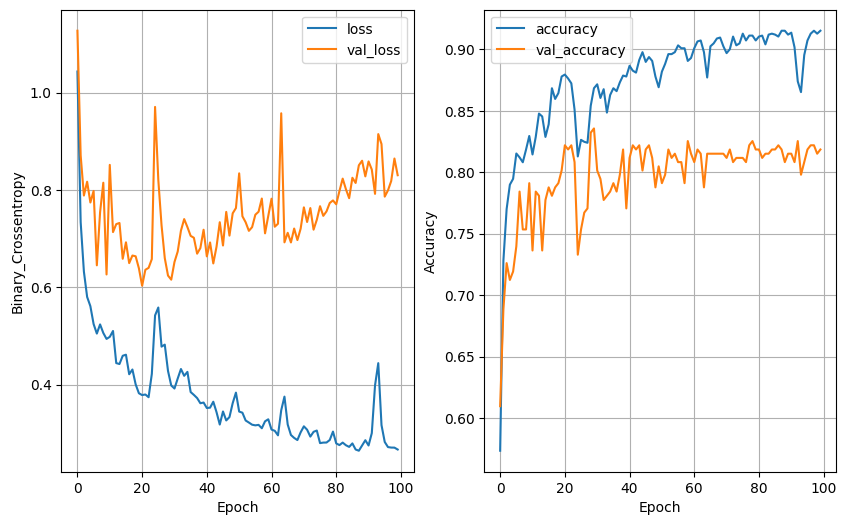

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8177 - loss: 0.7433 
32 nodes,dropout 0,lr 0.001,batch_sizes 32


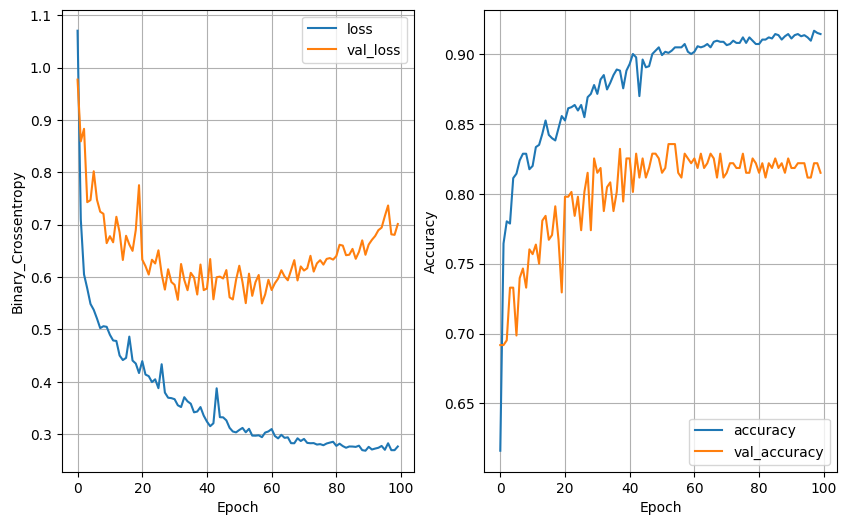

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8156 - loss: 0.6507 
32 nodes,dropout 0,lr 0.001,batch_sizes 64


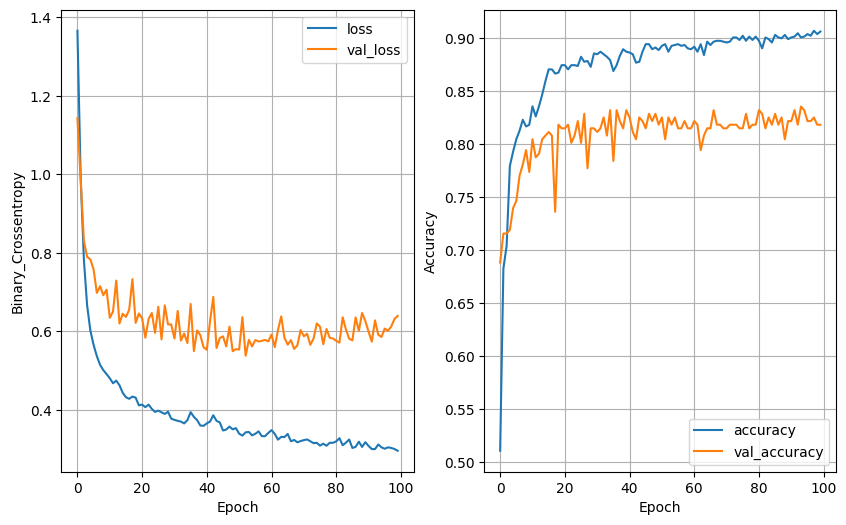

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8414 - loss: 0.5950 
32 nodes,dropout 0,lr 0.001,batch_sizes 128


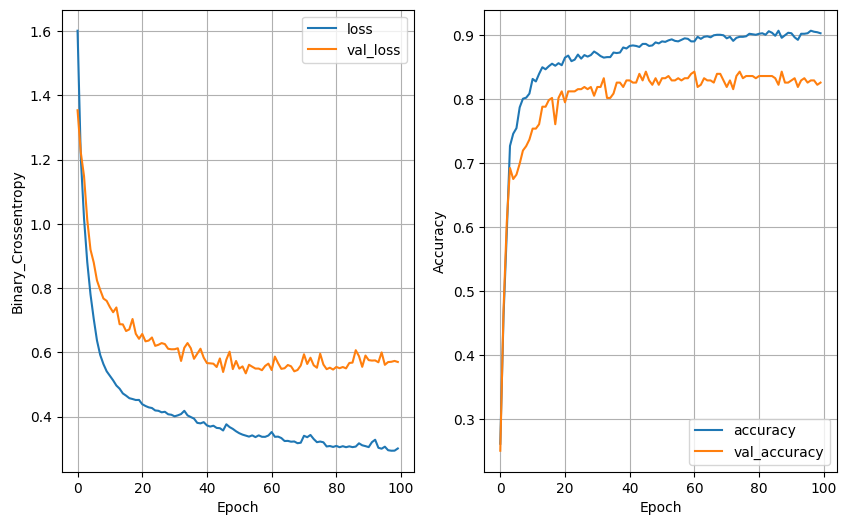

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8373 - loss: 0.5371 
32 nodes,dropout 0.2,lr 0.01,batch_sizes 32


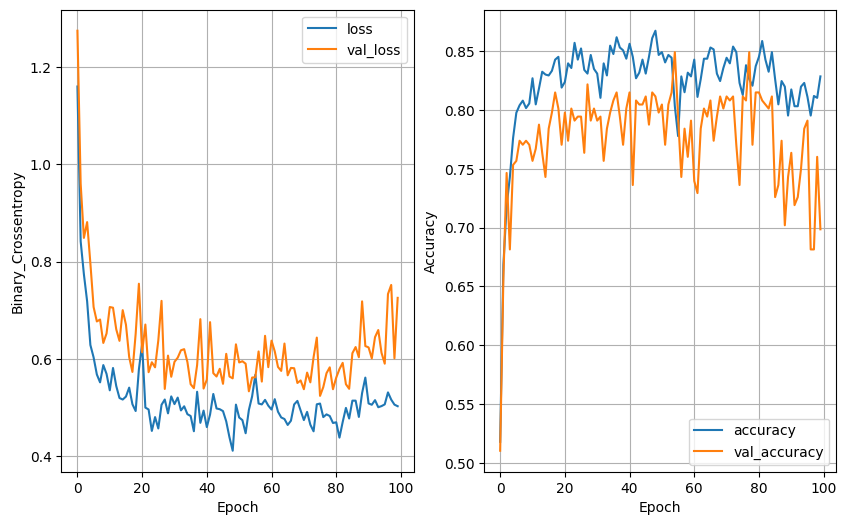

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7095 - loss: 0.6976 
32 nodes,dropout 0.2,lr 0.01,batch_sizes 64


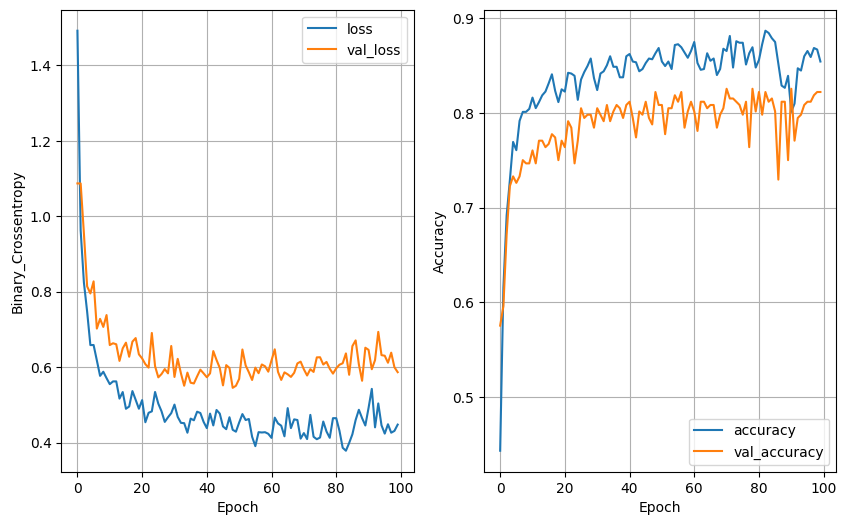

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8328 - loss: 0.5556 
32 nodes,dropout 0.2,lr 0.01,batch_sizes 128


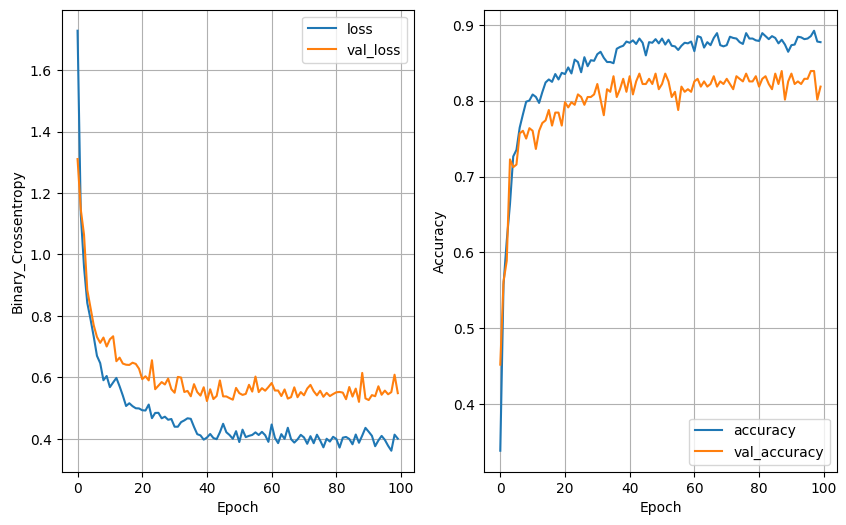

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8439 - loss: 0.5000 
32 nodes,dropout 0.2,lr 0.005,batch_sizes 32


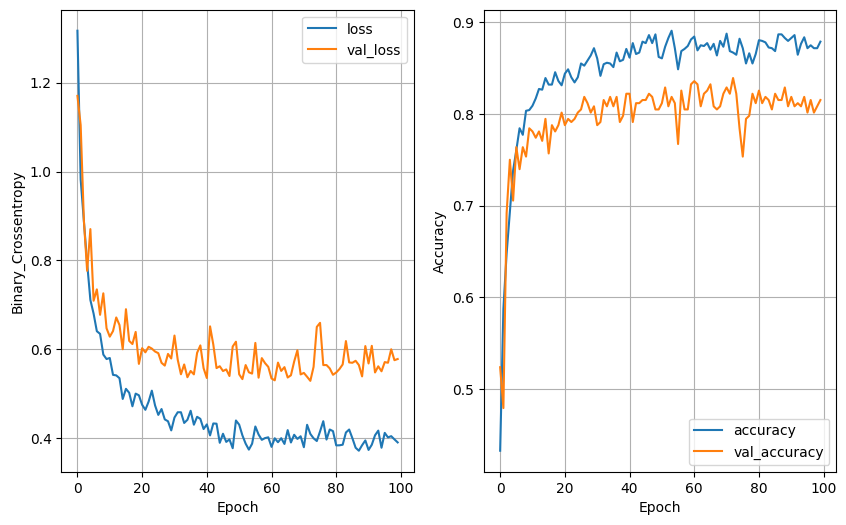

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8345 - loss: 0.5367 
32 nodes,dropout 0.2,lr 0.005,batch_sizes 64


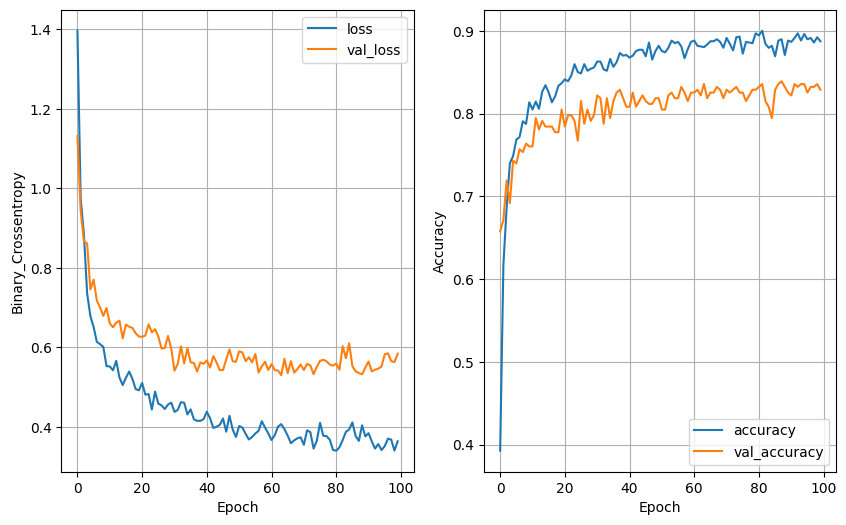

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8409 - loss: 0.5359 
32 nodes,dropout 0.2,lr 0.005,batch_sizes 128


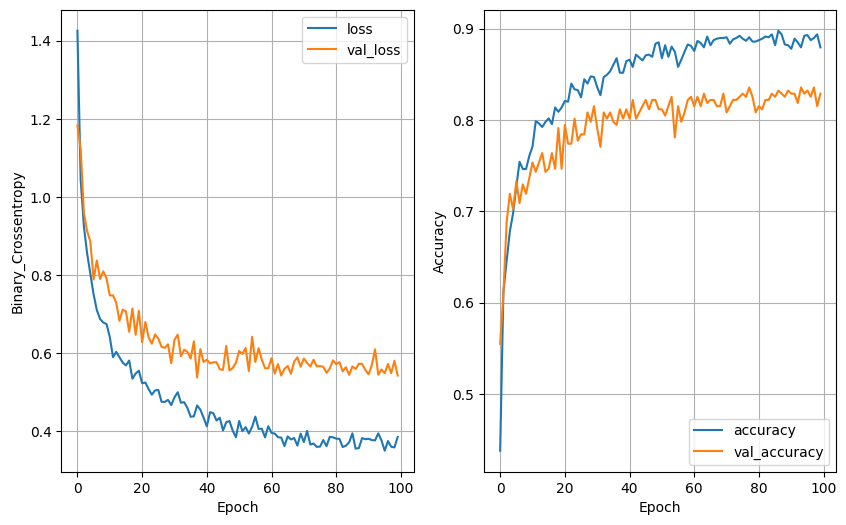

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8492 - loss: 0.4989 
32 nodes,dropout 0.2,lr 0.001,batch_sizes 32


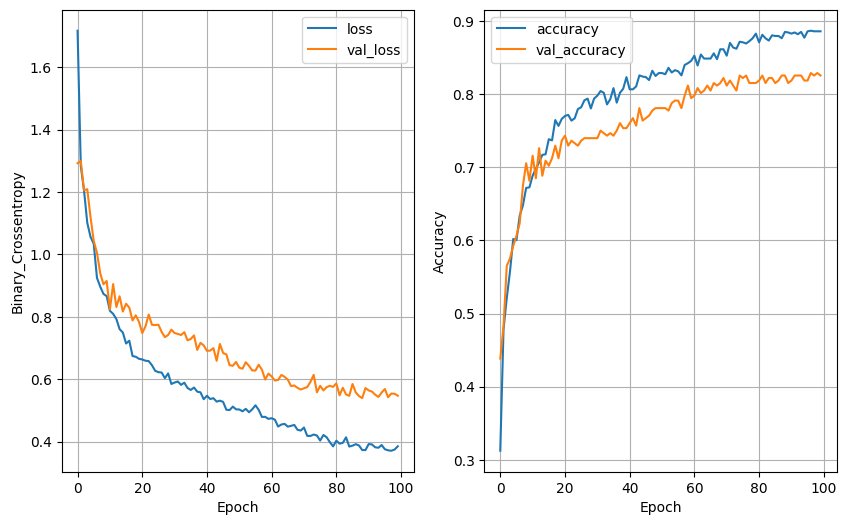

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8434 - loss: 0.5092 
32 nodes,dropout 0.2,lr 0.001,batch_sizes 64


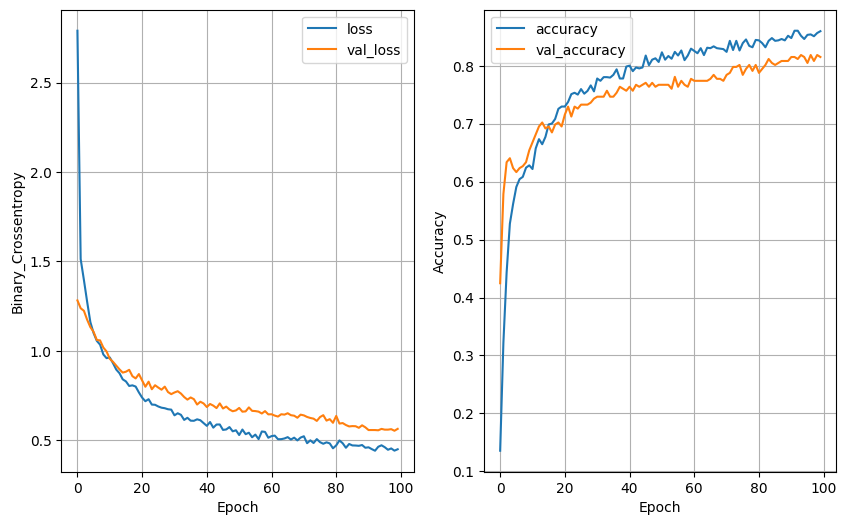

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8327 - loss: 0.5343 
32 nodes,dropout 0.2,lr 0.001,batch_sizes 128


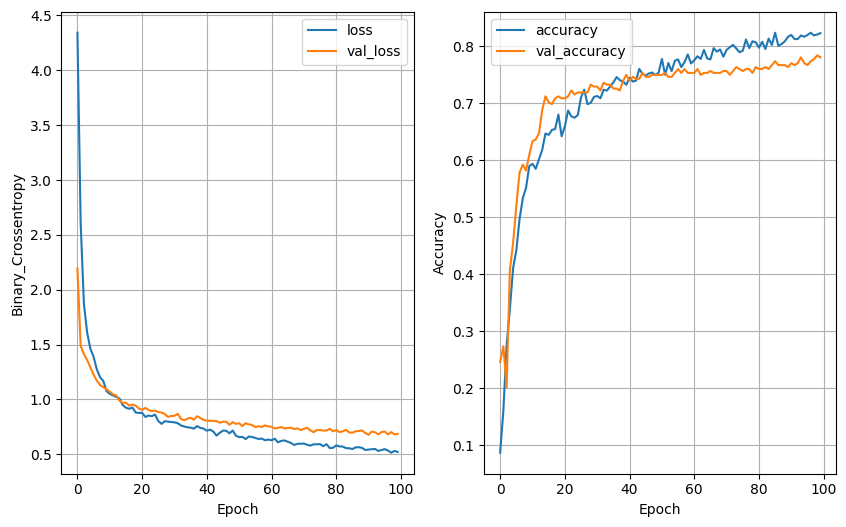

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7942 - loss: 0.6545 
64 nodes,dropout 0,lr 0.01,batch_sizes 32


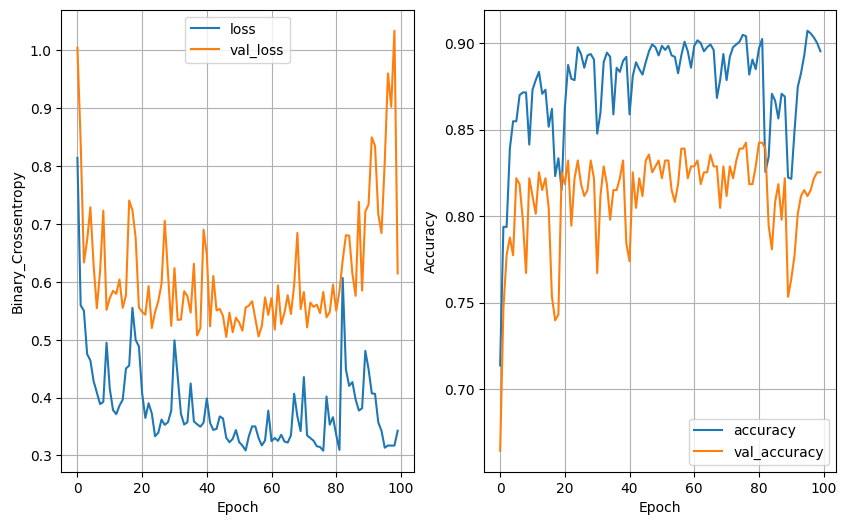

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8279 - loss: 0.6178 
64 nodes,dropout 0,lr 0.01,batch_sizes 64


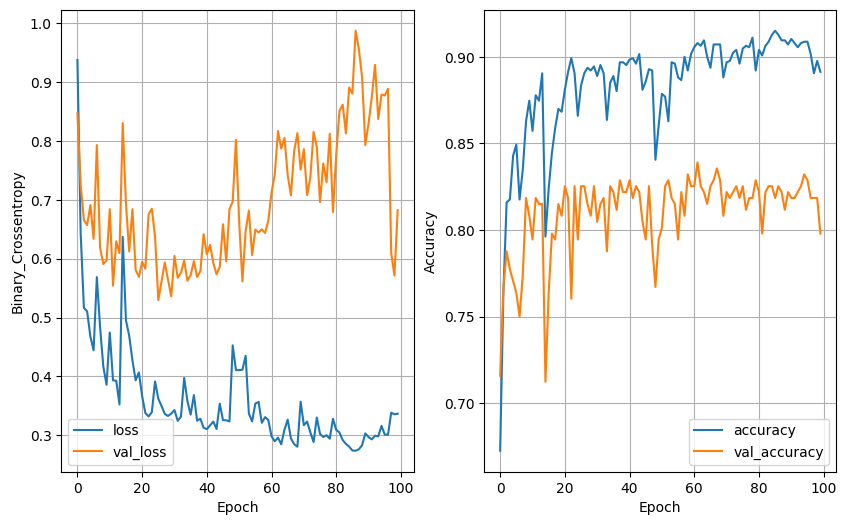

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8139 - loss: 0.6166 
64 nodes,dropout 0,lr 0.01,batch_sizes 128


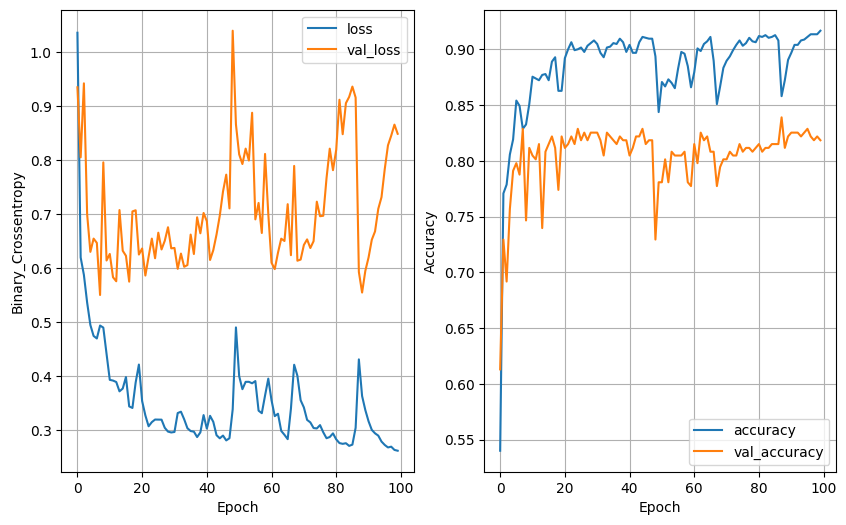

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8287 - loss: 0.7116 
64 nodes,dropout 0,lr 0.005,batch_sizes 32


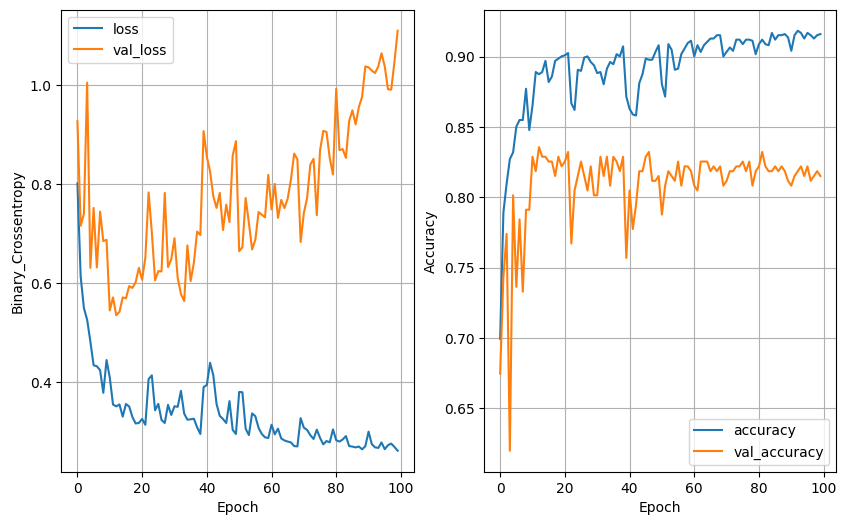

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8141 - loss: 1.0456 
64 nodes,dropout 0,lr 0.005,batch_sizes 64


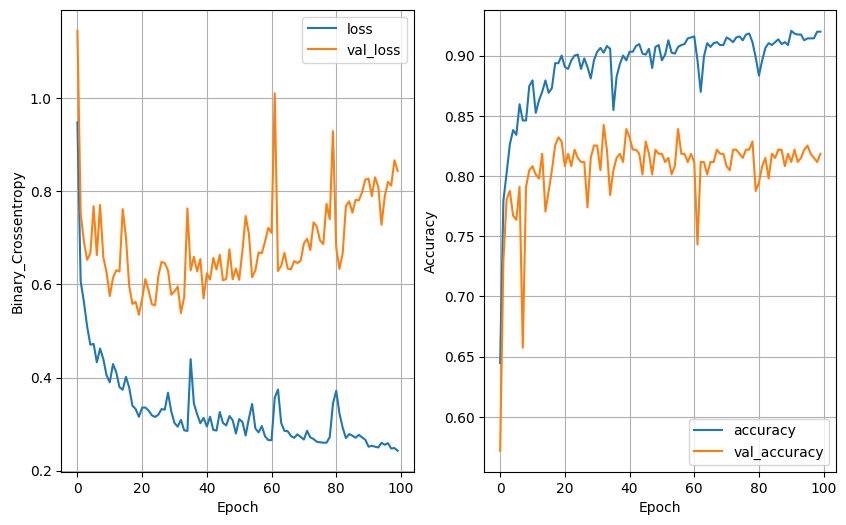

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8256 - loss: 0.7878 
64 nodes,dropout 0,lr 0.005,batch_sizes 128


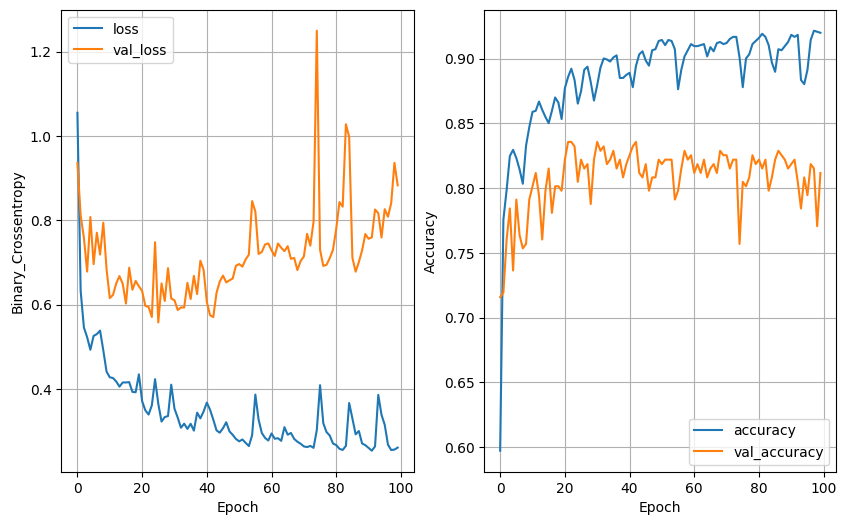

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8169 - loss: 0.7770 
64 nodes,dropout 0,lr 0.001,batch_sizes 32


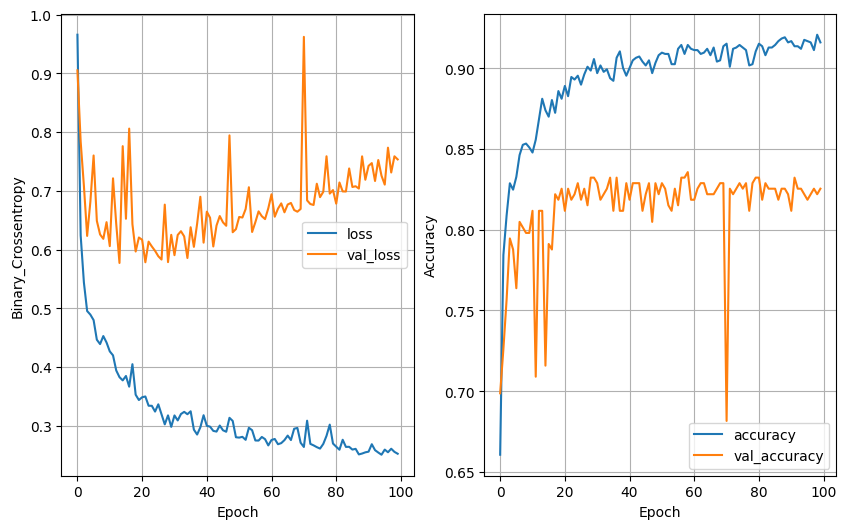

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8300 - loss: 0.6647 
64 nodes,dropout 0,lr 0.001,batch_sizes 64


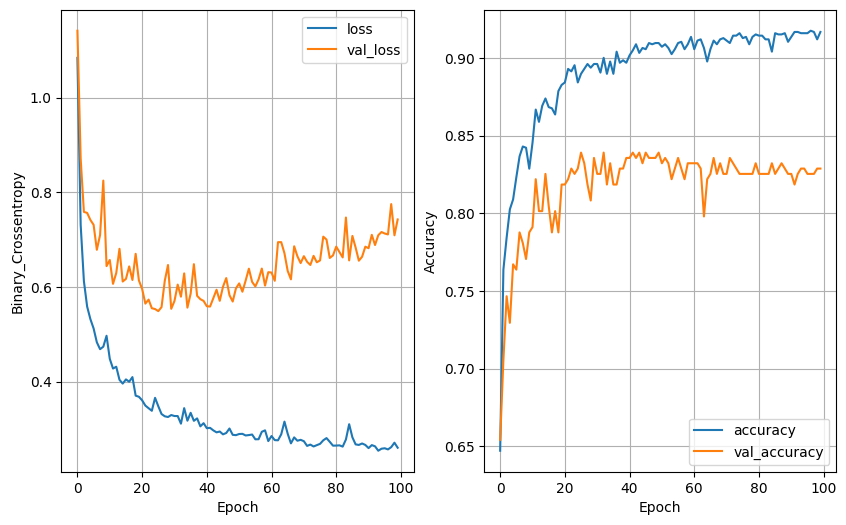

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8313 - loss: 0.6745 
64 nodes,dropout 0,lr 0.001,batch_sizes 128


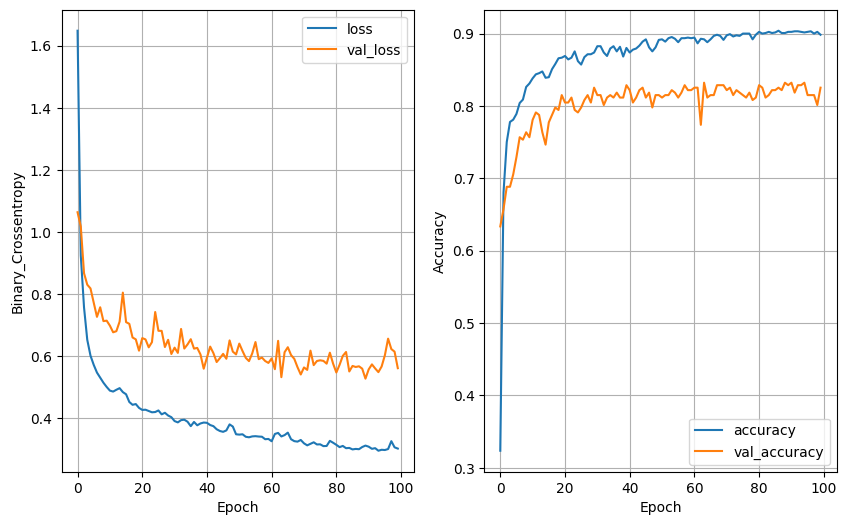

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8324 - loss: 0.5333 
64 nodes,dropout 0.2,lr 0.01,batch_sizes 32


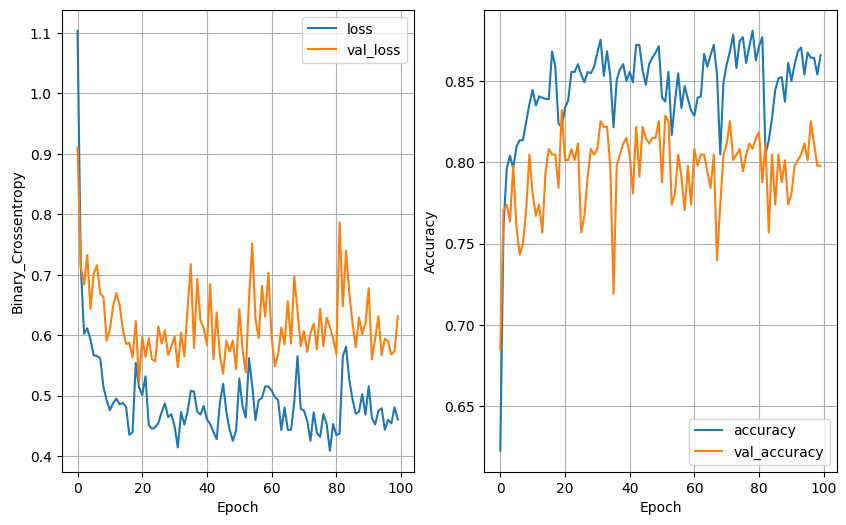

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8234 - loss: 0.5801 
64 nodes,dropout 0.2,lr 0.01,batch_sizes 64


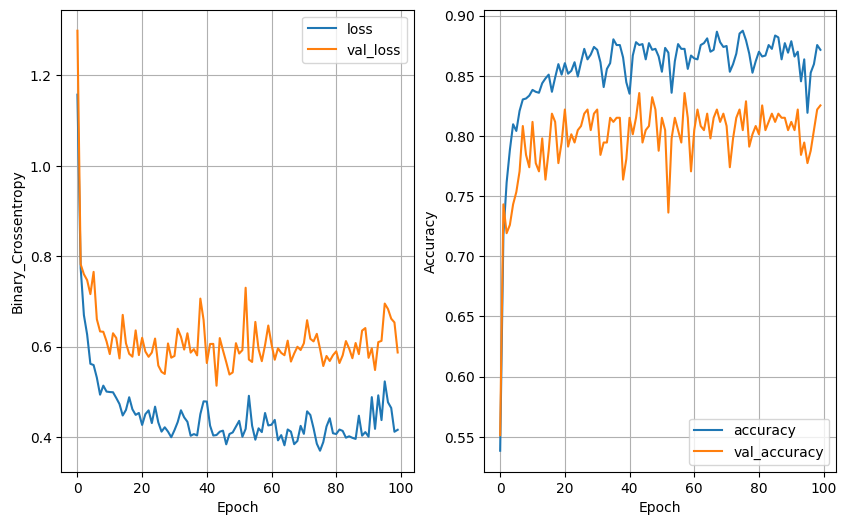

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8414 - loss: 0.5484 
64 nodes,dropout 0.2,lr 0.01,batch_sizes 128


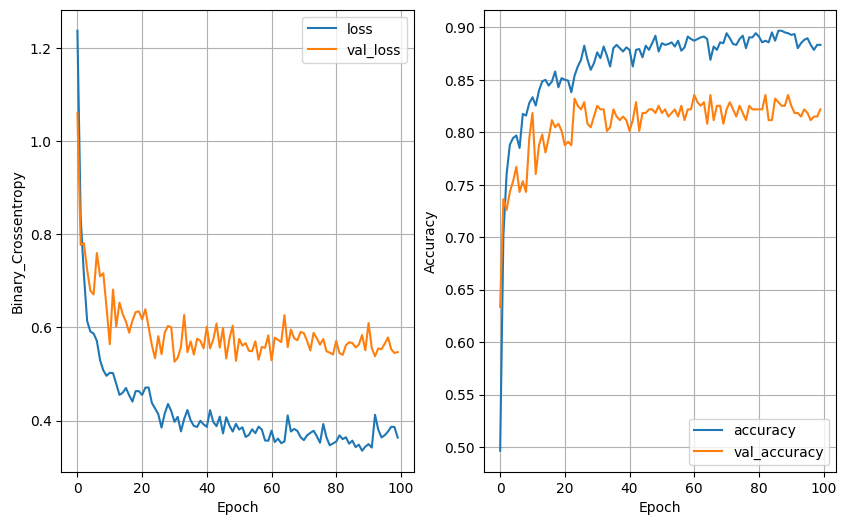

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8417 - loss: 0.4891 
64 nodes,dropout 0.2,lr 0.005,batch_sizes 32


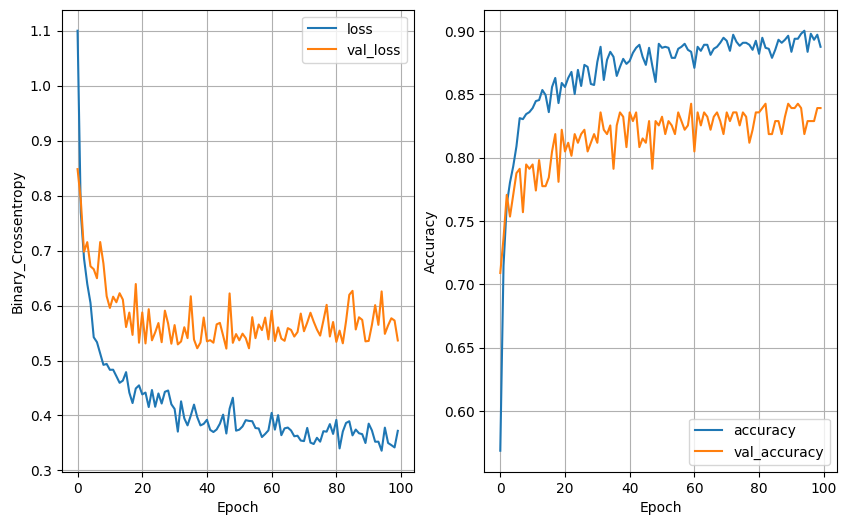

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8588 - loss: 0.4797 
64 nodes,dropout 0.2,lr 0.005,batch_sizes 64


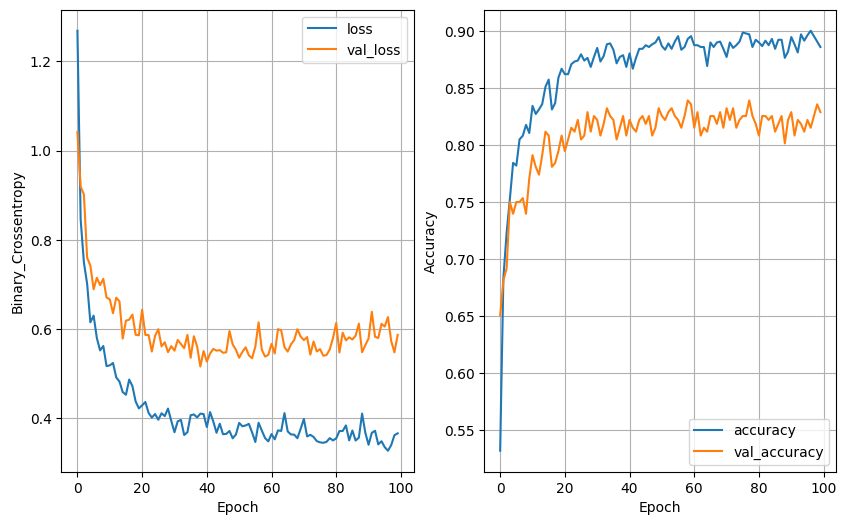

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8479 - loss: 0.5343 
64 nodes,dropout 0.2,lr 0.005,batch_sizes 128


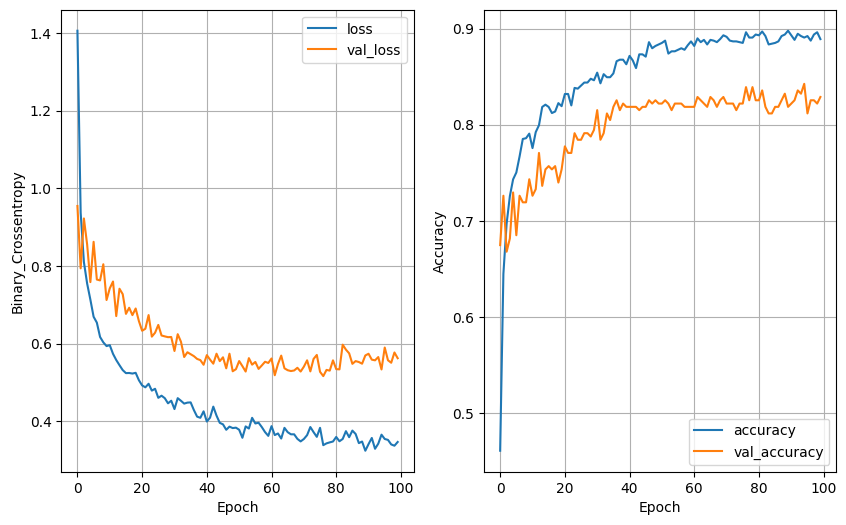

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8530 - loss: 0.5100 
64 nodes,dropout 0.2,lr 0.001,batch_sizes 32


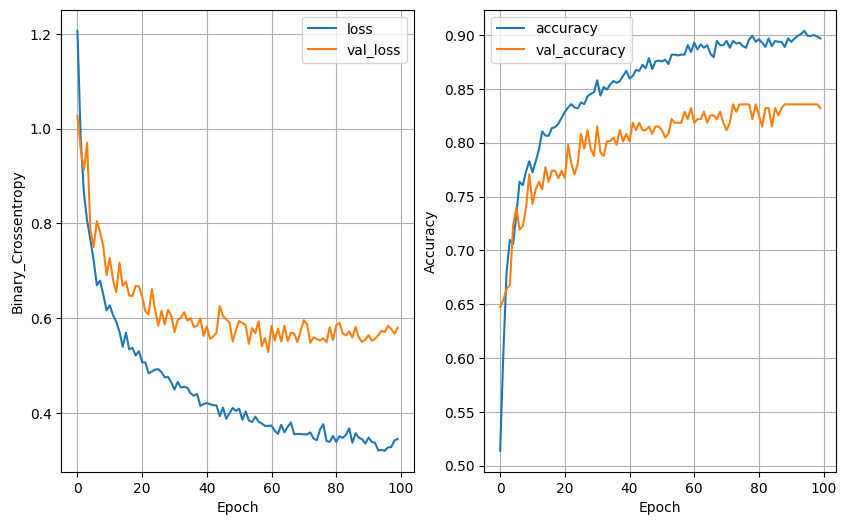

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8513 - loss: 0.5275 
64 nodes,dropout 0.2,lr 0.001,batch_sizes 64


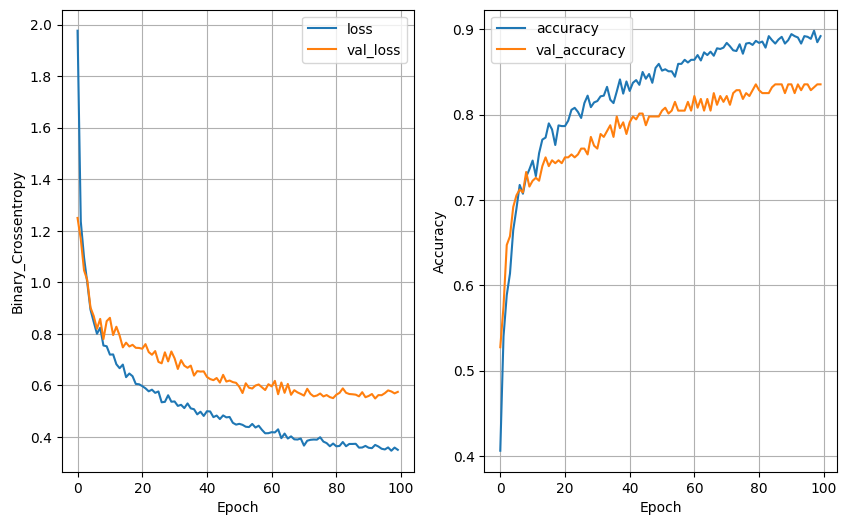

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8530 - loss: 0.5316 
64 nodes,dropout 0.2,lr 0.001,batch_sizes 128


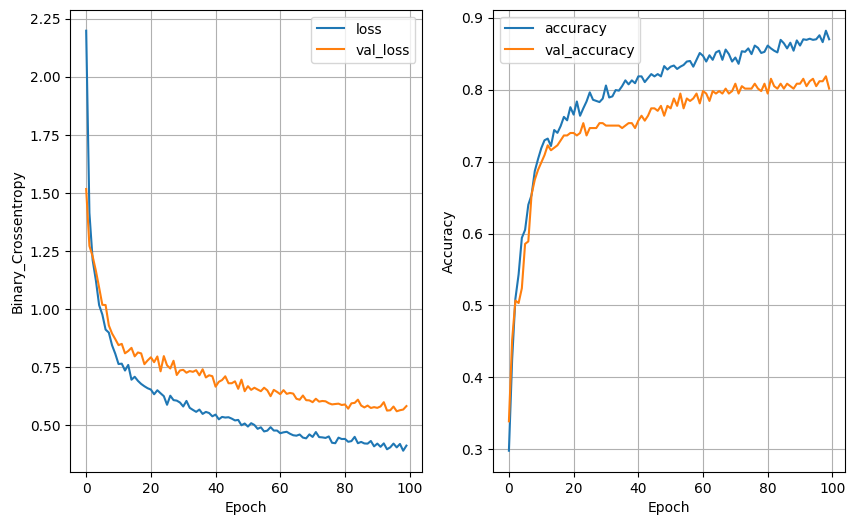

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8164 - loss: 0.5458 
128 nodes,dropout 0,lr 0.01,batch_sizes 32


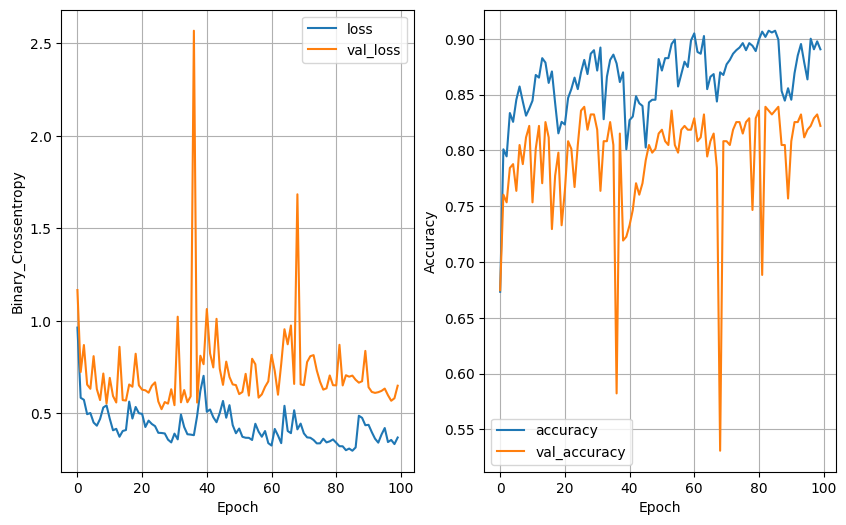

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8388 - loss: 0.6109 
128 nodes,dropout 0,lr 0.01,batch_sizes 64


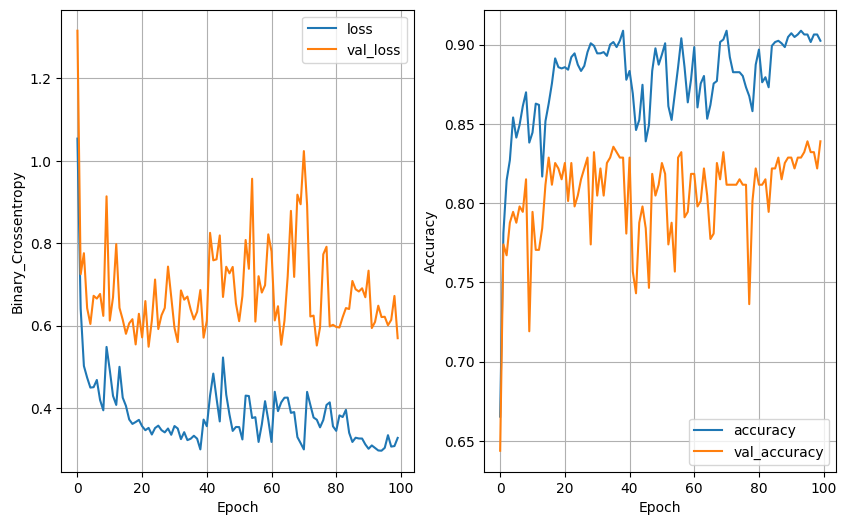

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8588 - loss: 0.5003 
128 nodes,dropout 0,lr 0.01,batch_sizes 128


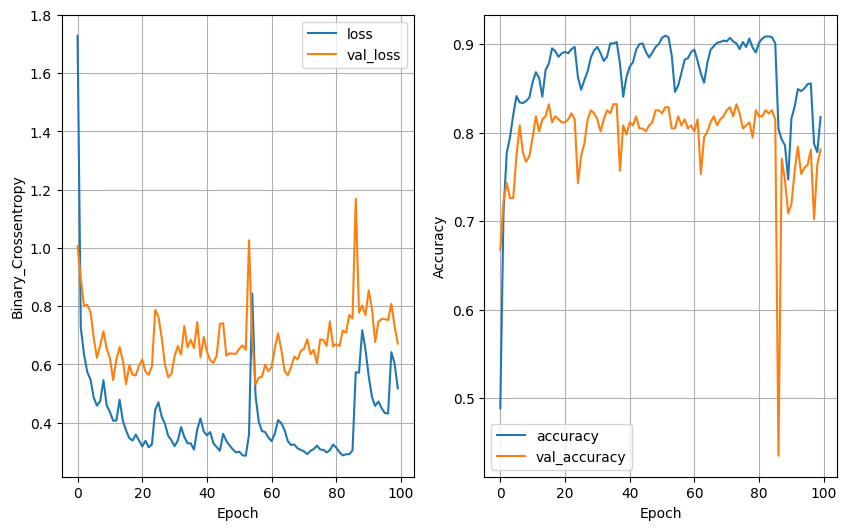

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7971 - loss: 0.6410 
128 nodes,dropout 0,lr 0.005,batch_sizes 32


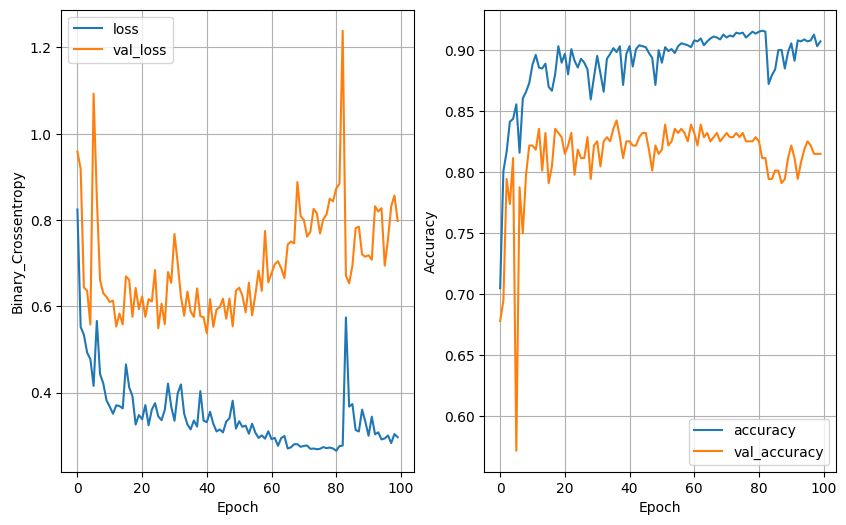

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8212 - loss: 0.7264 
128 nodes,dropout 0,lr 0.005,batch_sizes 64


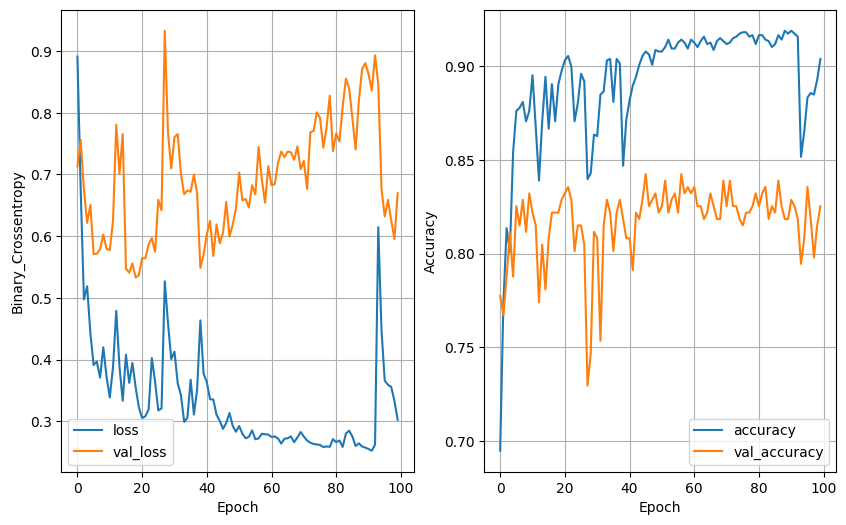

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8314 - loss: 0.6282 
128 nodes,dropout 0,lr 0.005,batch_sizes 128


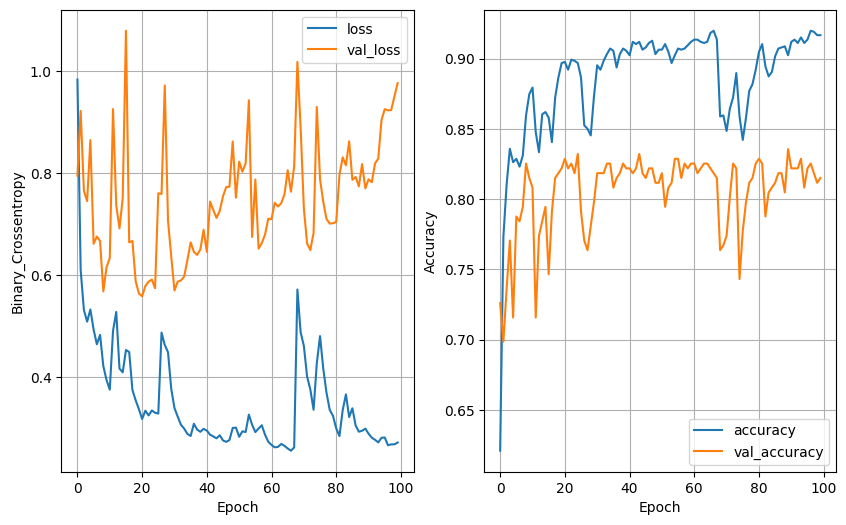

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8195 - loss: 0.8510 
128 nodes,dropout 0,lr 0.001,batch_sizes 32


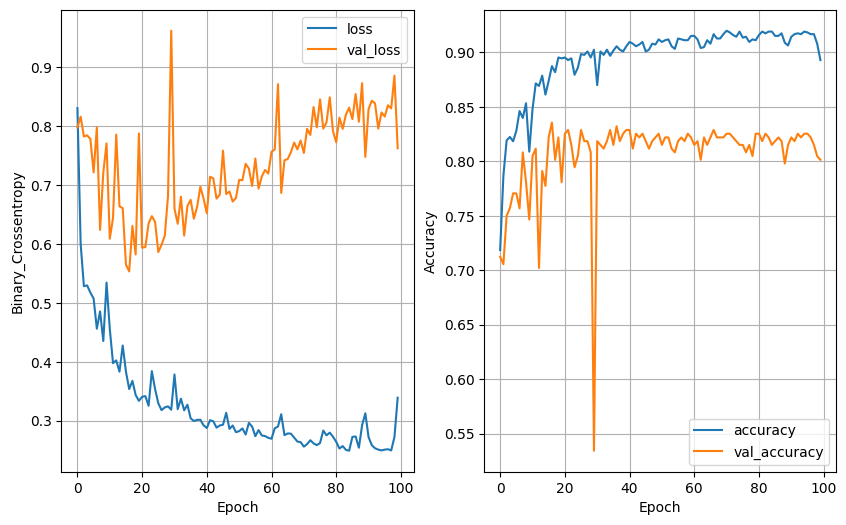

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8091 - loss: 0.6995 
128 nodes,dropout 0,lr 0.001,batch_sizes 64


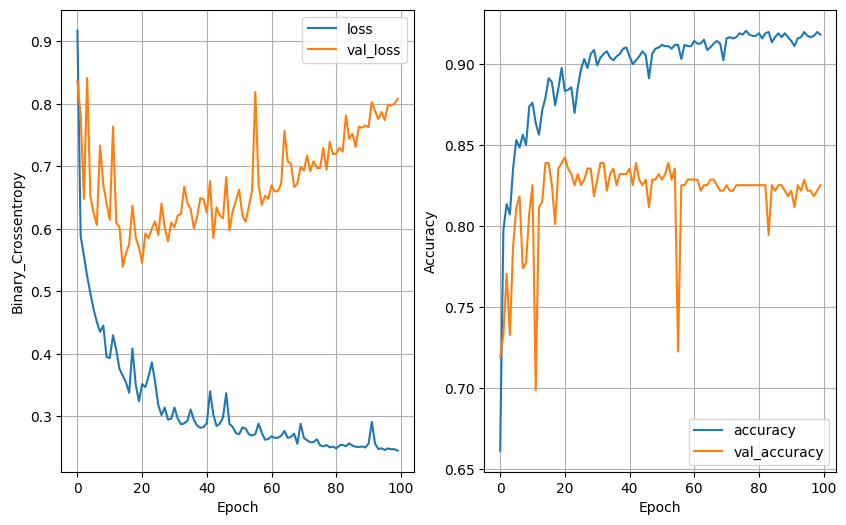

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8273 - loss: 0.7529 
128 nodes,dropout 0,lr 0.001,batch_sizes 128


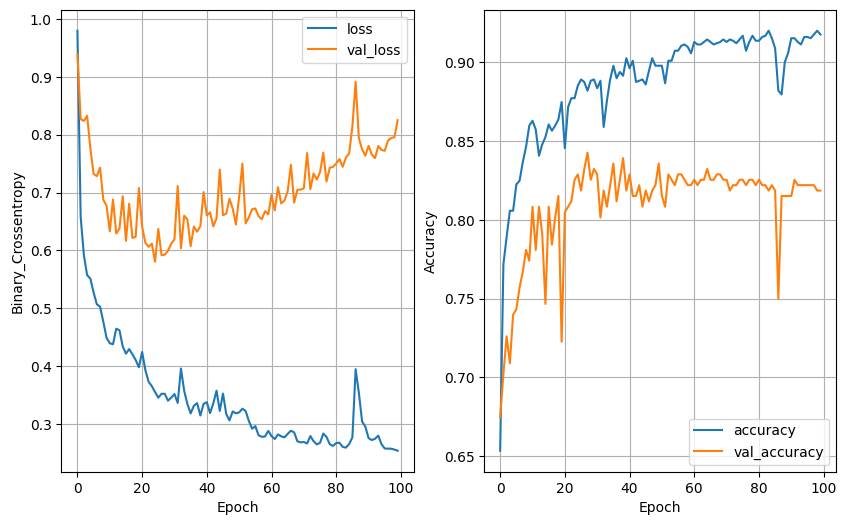

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8162 - loss: 0.7486 
128 nodes,dropout 0.2,lr 0.01,batch_sizes 32


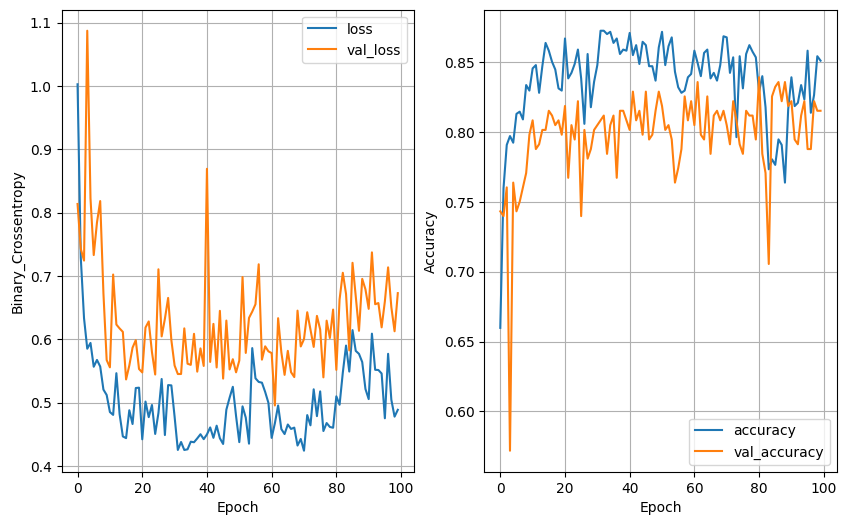

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8389 - loss: 0.6127 
128 nodes,dropout 0.2,lr 0.01,batch_sizes 64


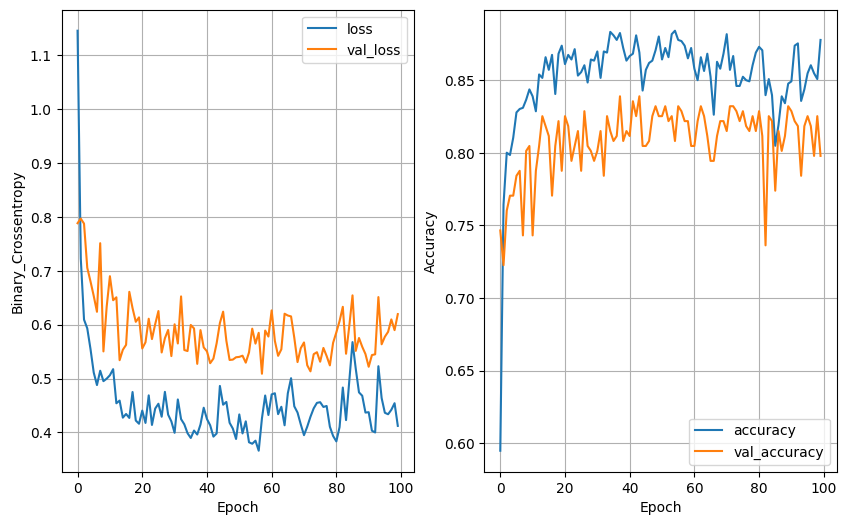

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8158 - loss: 0.5659 
128 nodes,dropout 0.2,lr 0.01,batch_sizes 128


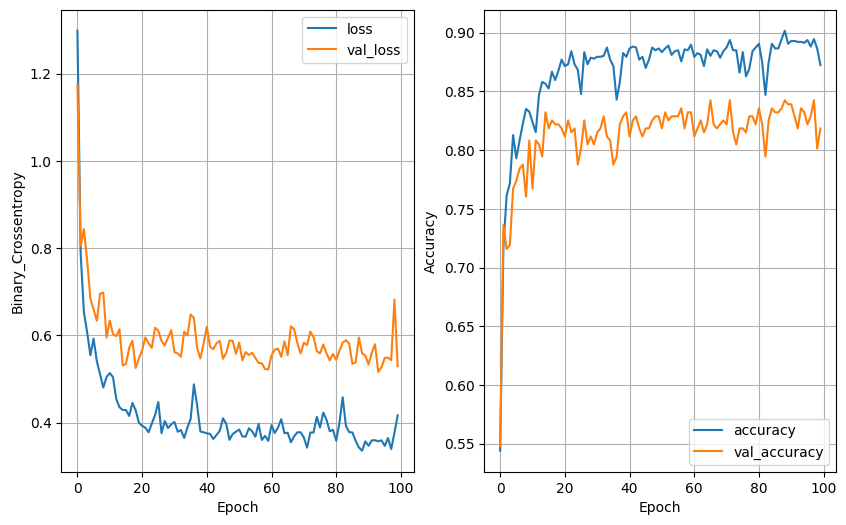

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8385 - loss: 0.4928 
128 nodes,dropout 0.2,lr 0.005,batch_sizes 32


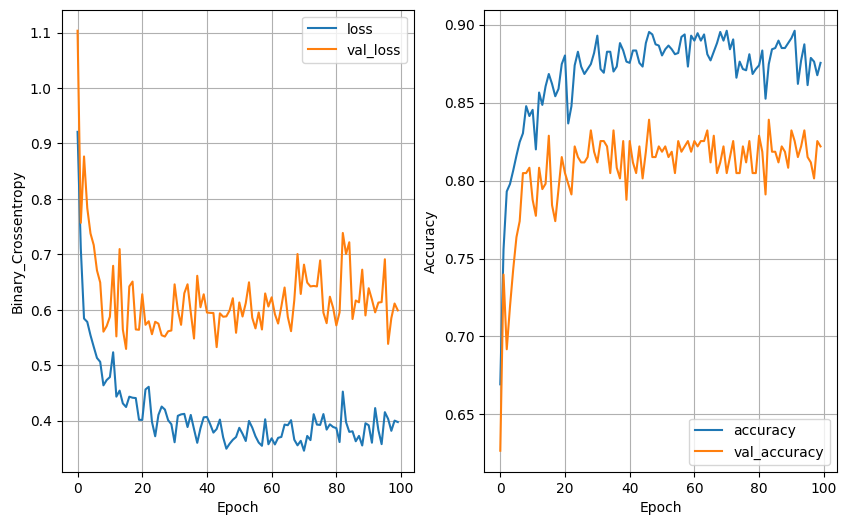

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8416 - loss: 0.5277 
128 nodes,dropout 0.2,lr 0.005,batch_sizes 64


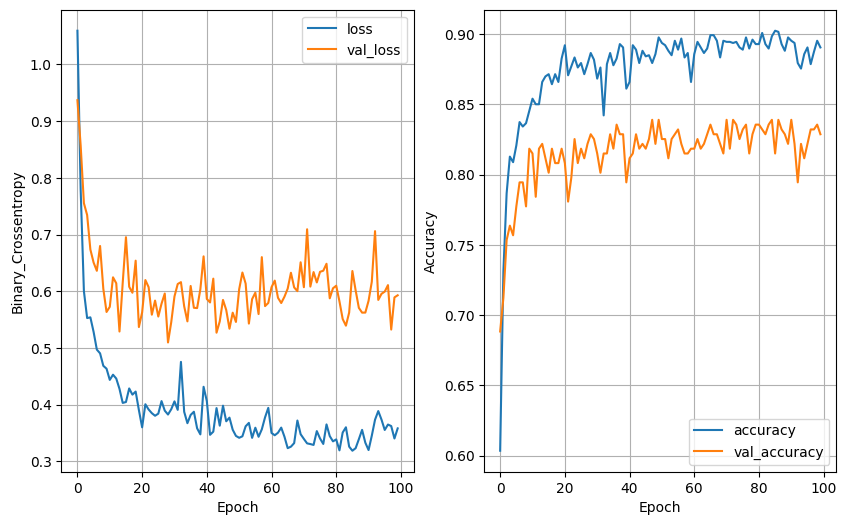

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8431 - loss: 0.5341
128 nodes,dropout 0.2,lr 0.005,batch_sizes 128


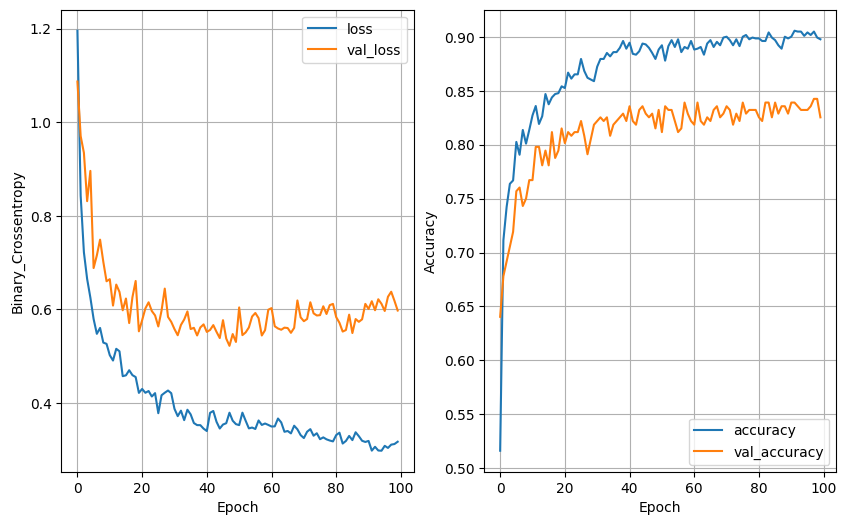

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8442 - loss: 0.5494 
128 nodes,dropout 0.2,lr 0.001,batch_sizes 32


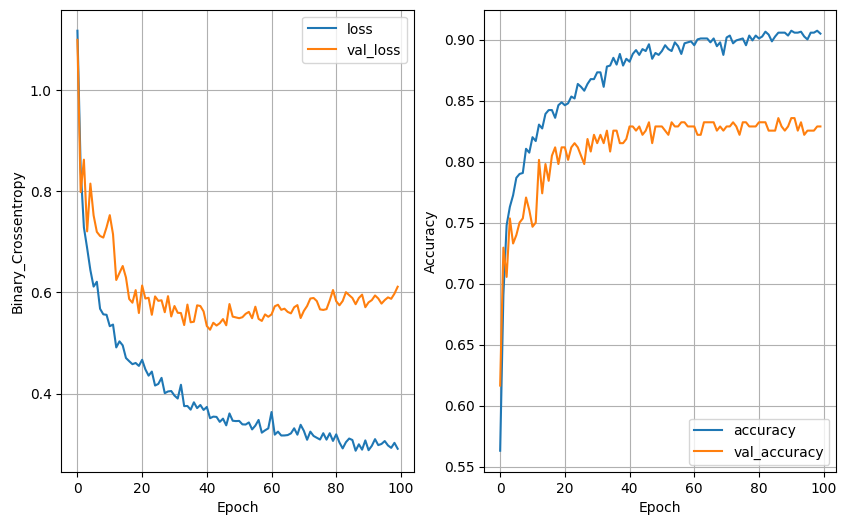

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8430 - loss: 0.5723 
128 nodes,dropout 0.2,lr 0.001,batch_sizes 64


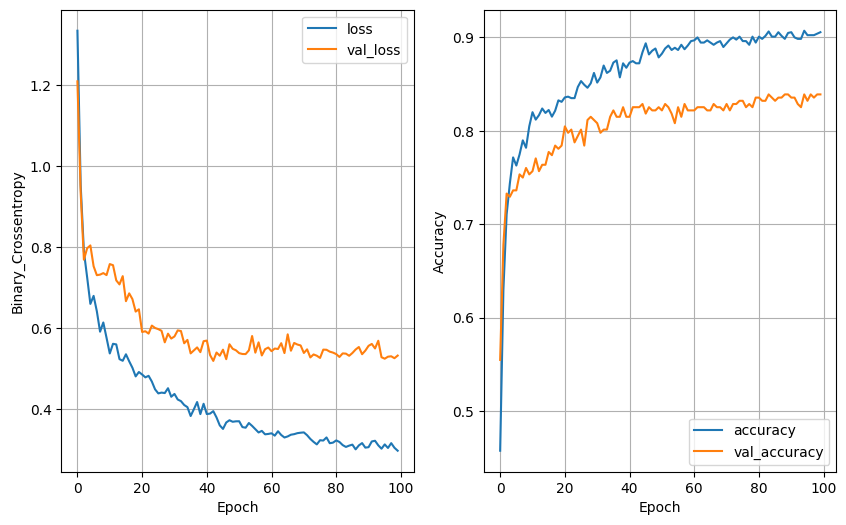

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8536 - loss: 0.4899 
128 nodes,dropout 0.2,lr 0.001,batch_sizes 128


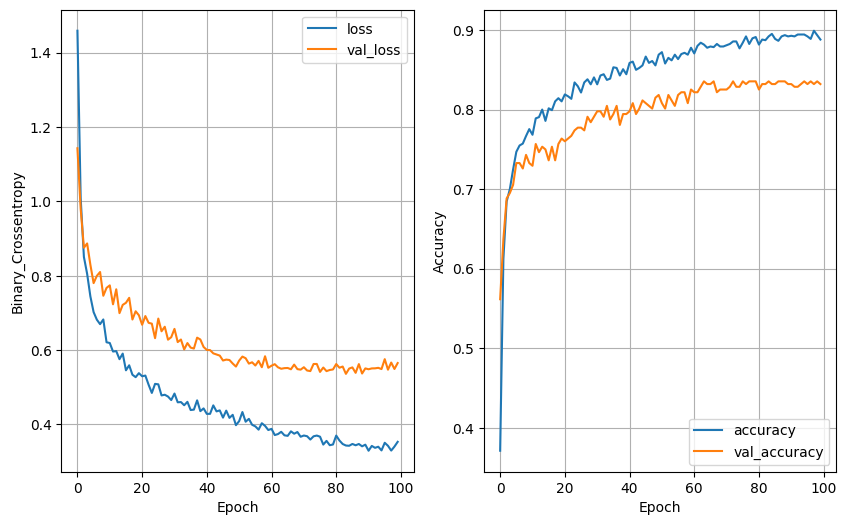

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8513 - loss: 0.5168 


In [21]:
least_val_loss = float('inf')
least_val_model = None
epochs  = 100
for num_modes in [32,64,128]:
  for dropout_prob in [0,0.2]:
    for lr in [0.01,0.005,0.001]:
      for batch_size in [32,64,128]:
        model,history = model_trainer(X_train_over,y_train_over,num_modes,dropout_prob,lr,batch_size,epochs)
        print(f"{num_modes} nodes,dropout {dropout_prob},lr {lr},batch_sizes {batch_size}")
        plot_historys(history)
        val_loses = model.evaluate(X_val,y_val)[0]
        if val_loses < least_val_loss:
          least_val_loss = val_loses
          least_val_model = model

In [22]:
least_val_model.summary()

Model: "sequential_47"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_235 (Dense)                    │ (None, 128)                 │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_188 (Dropout)                │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_236 (Dense)                    │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_189 (Dropout)                │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_237 (Dense)                    │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_190 (Dropout)                │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_238 (Dense)                    │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_191 (Dropout)                │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_239 (Dense)                    │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 152,465 (595.57 KB)

 Trainable params: 50,821 (198.52 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 101,644 (397.05 KB)

In [23]:
y_pred = least_val_model.predict(X_test)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [24]:

for i in range(len(y_pred)):
  for j in range(5):
    if 1>y_pred[i][j]>0.1:
      y_pred[i][j]= 1
    else:
      y_pred[i][j]=0

print("Complete")

Complete


In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.50      0.11      0.18         9
           1       0.14      0.96      0.25        25
           2       0.72      0.97      0.82       120
           3       0.33      0.75      0.46         8
           4       0.76      1.00      0.86       131

   micro avg       0.53      0.95      0.68       293
   macro avg       0.49      0.76      0.52       293
weighted avg       0.67      0.95      0.76       293
 samples avg       0.63      0.95      0.73       293



In [26]:
matrix = confusion_matrix(y_test.astype(int).reshape(-1,),y_pred.astype(int).reshape(-1,))
print(matrix)

[[929 243]
 [ 15 278]]


In [29]:
least_val_model.save('nn_model.keras')